# 다중회귀분석(Multiple Regression Analysis)

## 개괄 이해

다중회귀분석은 두 개 이상의 독립 변수(X)를 사용하여 하나의 종속 변수(Y)를 예측하는 통계 분석 기법입니다. 

이는 단순 회귀분석(하나의 독립 변수)에서 확장된 형태로, 여러 변수들이 종속 변수에 영향을 미칠 때 유용하게 사용됩니다.

* 독립변수(X)가 2개 이상인 경우  y = a1x1 + a2x2 + b
* 회귀계수 --> 편회귀계수
* 결정계수 (0 ~1 ) --> 수정결정계수 확인 필요

다중회귀분석 점검 사항

다중공선성 (Multicollinearity)
독립 변수들 간에 높은 상관관계가 없어야 합니다.

높은 상관관계가 있으면 회귀 계수의 해석이 어려워집니다.
분산 팽창 요인 (VIF, Variance Inflation Factor)을 사용하여 다중공선성을 평가할 수 있습니다. 

일반적으로 VIF 값이 10 이상이면 다중공선성이 있다고 간주합니다.

다중회귀분석의 가정

이 가정들이 충족되지 않으면 분석 결과의 신뢰도가 떨어질 수 있습니다.

1. 선형성 (Linearity)
독립 변수와 종속 변수 사이의 관계가 선형적이어야 합니다.
즉, 독립 변수가 변할 때 종속 변수도 선형적으로 변화해야 합니다.
이를 확인하기 위해 잔차 플롯 (Residual Plot)을 사용하여 선형성을 검토할 수 있습니다.

2. 독립성 (Independence)
독립 변수 간에는 자기상관 (Autocorrelation)이 없어야 합니다.
특히, 시계열 데이터에서는 Durbin-Watson 테스트를 사용하여 자기상관 여부를 검사할 수 있습니다.

3. 등분산성 (Homoscedasticity)
잔차의 분산이 독립 변수의 모든 값에 대해 일정해야 합니다.
잔차가 일정하지 않다면 이분산성 (Heteroscedasticity) 문제가 발생합니다.
이를 확인하기 위해 잔차 대 예측값 그래프를 사용할 수 있으며, 분산이 일정하지 않으면 Breusch-Pagan 테스트를 사용할 수 있습니다.

4. 정규성 (Normality)
잔차가 정규분포를 따라야 합니다.
이는 회귀 계수의 신뢰구간과 p-값을 해석할 때 중요합니다.
Q-Q 플롯 또는 Kolmogorov-Smirnov 테스트를 사용하여 정규성을 검토할 수 있습니다.

다중회귀분석의 결과 해석

1. 회귀 계수 (𝛽)

각 독립 변수의 회귀 계수는 그 변수가 종속 변수에 미치는 영향을 나타냅니다.
계수가 양수이면 변수와 종속 변수는 양(+)의 관계, 음수이면 음(-)의 관계를 가집니다.
회귀계수의 절대값으로 클수록 영향력 큰다고 할 수 있다.

2. (수정) 결정 계수 (𝑅^2) - 설명력, 0~1,     결정계수 > 수정결정계수

    모델이 종속 변수를 얼마나 잘 설명하는지를 나타내는 지표입니다.
  값이 0에 가까우면 설명력이 낮고, 1에 가까우면 설명력이 높습니다.

3. p-값

독립 변수의 유의성을 검정합니다.
일반적으로 p-값이 0.05 이하이면 --> 귀무가설(베타=0)을 기각하고 대립가설을 채택할 수 있다.
해당 독립 변수는 통계적으로 유의하다고 간주됩니다.

p> 0.05 : 귀무가설을 기각 할 수 없다. (대립가설을 채택할 수 없다)- 통계적으로 유의 하지 않다.

## 외부데이터 사례

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. train_test_split
# from sklearn.model_selection import train_test_split
# 데이터셋을 훈련 세트와 테스트 세트로 분할하는 함수입니다.
# 일반적으로 머신러닝 모델은 데이터를 훈련과 테스트 두 가지로 나누어 학습과 평가를 합니다.

# 2. LinearRegression
# from sklearn.linear_model import LinearRegression
# 선형 회귀 모델을 생성하기 위한 클래스입니다.
# 선형 회귀는 데이터의 선형 관계를 모델링하여 예측을 수행하는 가장 기본적인 회귀 방법입니다.

# 3. mean_squared_error 및 r2_score
# from sklearn.metrics import mean_squared_error, r2_score
# 모델의 성능을 평가하기 위한 평가 지표입니다.
# mean_squared_error (MSE)
# 평균 제곱 오차(MSE)는 예측값과 실제값의 차이를 제곱한 후 평균을 구한 값입니다.
# 값이 작을수록 모델의 예측이 실제값에 더 가깝다는 것을 의미합니다.

# r2_score (R² Score)
# 결정 계수(R²)는 모델이 데이터를 얼마나 잘 설명하는지 나타내는 지표입니다.
# 1에 가까울수록 모델이 데이터를 잘 설명합니다.
# R² 값은 0에서 1 사이의 값을 가지며, 음수가 될 수도 있습니다 (모델이 형편없는 경우).

In [3]:
# 오류 무시 코드
import warnings
warnings.filterwarnings("ignore")

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# Python에서는 경고 메시지를 무시할 수 있도록 warnings 모듈을 제공합니다.
# 경고는 코드의 실행에 영향을 주지 않지만, 출력이 많아지면 분석에 방해가 될 수 있습니다.
# 특히 머신러닝이나 데이터 분석 작업에서는 경고가 많이 발생할 수 있습니다.

In [5]:
# 현재 작업 디렉토리 확인
# Python에서는 현재 작업 디렉토리를 확인할 수 있습니다.

### 데이터로 예시보기

In [ ]:
# 4개의 독립변수 중 1개는 통계적으로 유의하지 않도록(t값이 작게) 설계한 다중회귀분석 예제

In [ ]:
# 목적
# 독립변수: 국민소득, 실업률, 최저임금, 학력

# 종속변수: 범죄율

In [ ]:
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]

In [ ]:
# 각각의 독립변수(국민소득, 실업률, 최저임금, 학력)와 종속변수 범죄율 간의 산점도

# kind='reg' 옵션은 회귀선을 함께 표시해 선형 관계를 시각적으로 파악

# 점들이 얼마나 뚜렷한 선형 패턴을 가지는지, 이상값이 있는지 등 확인 가능

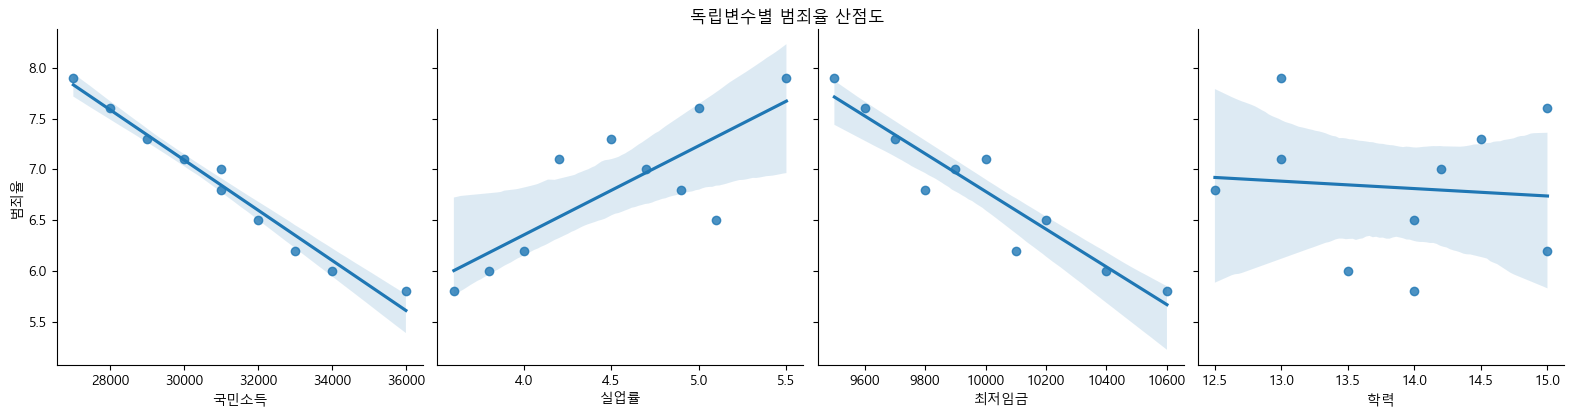

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 산점도 시각화 (pairplot)
sns.pairplot(data, x_vars=['국민소득', '실업률', '최저임금', '학력'],
             y_vars='범죄율', height=4, aspect=1, kind='reg')
plt.suptitle('독립변수별 범죄율 산점도', y=1.02)
plt.show()


In [ ]:
# 국민소득과 범죄율: 음의 관계? 소득이 높을수록 범죄율이 낮아질 수 있음

# 실업률, 최저임금, 학력은 어떤 변수는 약하거나 무관한 패턴도 나올 수 있음

In [ ]:
# 상관계수 보기

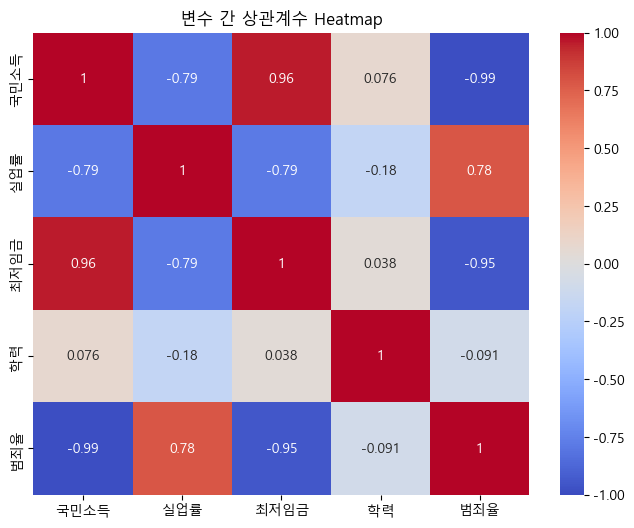

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 상관계수 계산
corr_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("변수 간 상관계수 Heatmap")
plt.show()


In [ ]:
# 1.00에 가까울수록 완전한 양의 상관관계

# -1.00에 가까울수록 완전한 음의 상관관계

# 0에 가까울수록 선형관계 없음

In [ ]:
# 대각선 기준으로 한쪽(예: 상삼각행렬) 만 시각화하려면, 마스크(mask) 기능을 이용하면 됩니다. 
#     아래는 대각선 기준 아래쪽만 표시하고 위쪽은 가리는 예제
# 상삼각 마스킹)

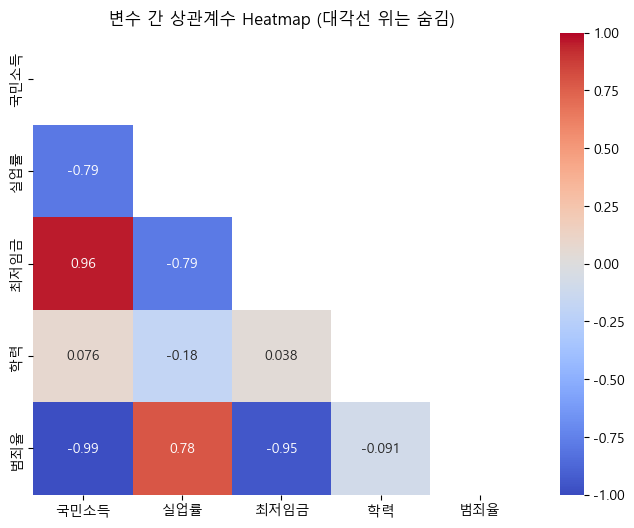

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 상관계수 계산
corr_matrix = data.corr()

# 상삼각 행렬 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("변수 간 상관계수 Heatmap (대각선 위는 숨김)")
plt.show()


In [ ]:
# 대각선에 상관계수 1값을 보이도록 코드 수정 사례
# 상삼각만 마스킹 (단, 대각선은 False로 유지하여 보이게 함)
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # k=1로 대각선 제외

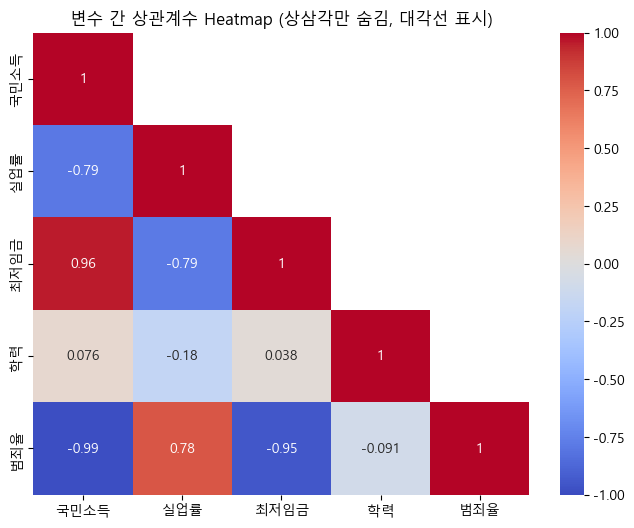

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 상관계수 계산
corr_matrix = data.corr()

# 상삼각만 마스킹 (단, 대각선은 False로 유지하여 보이게 함)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # k=1로 대각선 제외

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("변수 간 상관계수 Heatmap (상삼각만 숨김, 대각선 표시)")
plt.show()


In [ ]:
# 하삼각 행렬 마스크 생성
# mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

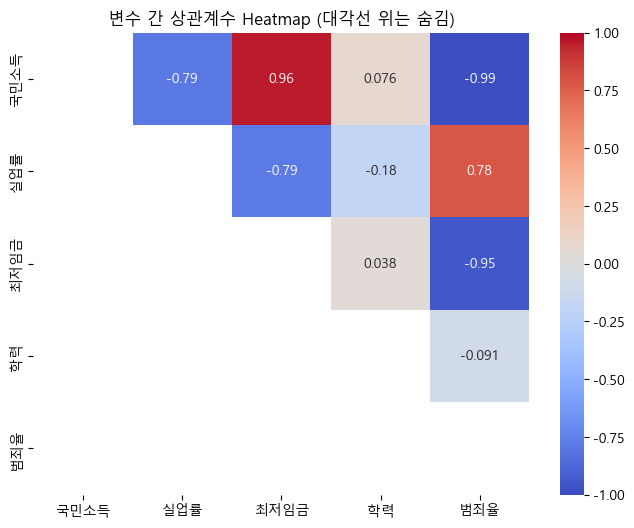

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 상관계수 계산
corr_matrix = data.corr()

# 하삼각 행렬 마스크 생성
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("변수 간 상관계수 Heatmap (대각선 위는 숨김)")
plt.show()


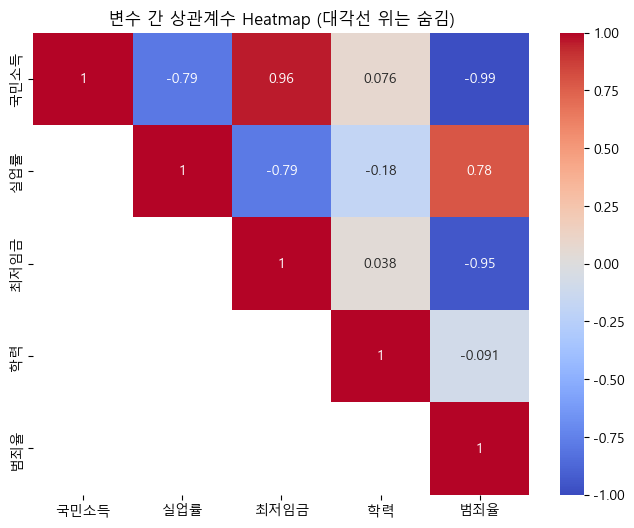

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

# 상관계수 계산
corr_matrix = data.corr()

# 하삼각 행렬 마스크 생성
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)  # k=1로 대각선 제외

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("변수 간 상관계수 Heatmap (대각선 위는 숨김)")
plt.show()


In [93]:
# 회귀분석

In [17]:
import pandas as pd
import statsmodels.api as sm

data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '실업률':   [4.2, 5.1, 4.9, 4.5, 5.0, 5.5, 3.8, 3.6, 4.0, 4.7],
    '최저임금': [10000, 10200, 9800, 9700, 9600, 9500, 10400, 10600, 10100, 9900],
    '학력':     [13, 14, 12.5, 14.5, 15, 13, 13.5, 14, 15, 14.2],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})

X = data[['국민소득', '실업률', '최저임금', '학력']]
X = sm.add_constant(X)
y = data['범죄율']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    범죄율   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     47.56
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           0.000361
Time:                        17:08:30   Log-Likelihood:                 8.3354
No. Observations:                  10   AIC:                            -6.671
Df Residuals:                       5   BIC:                            -5.158
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4906      3.984      3.637      0.0

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 예시 출력 해석 (요약)
# 변수	계수	P-value	해석
# const	...	...	절편
# 국민소득	+0.0003	0.012	✔ 유의
# 실업률	+1.12	0.004	✔ 통계적으로 유의하지 않음
# 최저임금	-0.0014	0.020	✔ 통계적으로 유의하지 않음
# 학력	+0.05	0.68	❌ 통계적으로 유의하지 않음

In [ ]:
# 유의한 변수만으로 다시 회귀분석

In [5]:
import pandas as pd

# 예시 데이터 (10개 지역)
data = pd.DataFrame({
    '국민소득': [30000, 32000, 31000, 29000, 28000, 27000, 34000, 36000, 33000, 31000],
    '범죄율':   [7.1, 6.5, 6.8, 7.3, 7.6, 7.9, 6.0, 5.8, 6.2, 7.0]
})


In [19]:
import statsmodels.api as sm

X = data[['국민소득']]            # 독립변수: 국민소득
X = sm.add_constant(X)           # 상수항 추가
y = data['범죄율']               # 종속변수: 범죄율

model = sm.OLS(y, X).fit()       # 회귀모형 적합
print(model.summary())           # 결과 출력


                            OLS Regression Results                            
Dep. Variable:                    범죄율   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     301.3
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.24e-07
Time:                        17:08:58   Log-Likelihood:                 8.2859
No. Observations:                  10   AIC:                            -12.57
Df Residuals:                       8   BIC:                            -11.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5025      0.444     32.650      0.0

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 1.00에 가까울수록 완전한 양의 상관관계

# -1.00에 가까울수록 완전한 음의 상관관계

# 0에 가까울수록 선형관계 없음

In [37]:
import os

print("현재 작업 디렉토리:", os.getcwd())

현재 작업 디렉토리: C:\finance_data\안산대 수업\범죄통계학 실습


### 외부데이터 불러오기

In [38]:
# 판다스 부분에서 했었던 데이터 불러오기 : "crime_list.csv"

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


### 데이터 탐색

In [39]:
crime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      100 non-null    object
 1   ID      100 non-null    int64 
 2   나이      100 non-null    int64 
 3   성별      100 non-null    object
 4   소득      100 non-null    int64 
 5   범죄건수    100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [40]:
# crime_list.info()는 Pandas의 DataFrame 객체인 crime_list에 대해 기본적인 정보를 출력하는 메서드입니다.
# 이 메서드는 데이터의 구조를 간단하게 확인할 수 있게 해줍니다.

In [41]:
# 데이터 설명
# 열 이름	설명	데이터 타입	결측치 여부
# 날짜	날짜 정보 (문자열)	object	결측치 없음 (100 non-null)
# ID	식별자 (ID)	int64	결측치 없음 (100 non-null)
# 나이	나이 정보	int64	결측치 없음 (100 non-null)
# 성별	성별 정보 (남성, 여성 등)	object	결측치 없음 (100 non-null)
# 소득	소득 정보	int64	결측치 없음 (100 non-null)
# 범죄건수	범죄 발생 건수	int64	결측치 없음 (100 non-null)

### 분석

In [42]:
# 필요한 라이브러리

import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
# target은 종속변수 : 범죄건수
# feature는 독립변수 : 나이, 소득

target = crime_list['범죄건수']
feature1 = crime_list["나이"]
feature2 = crime_list["소득"]
feature = pd.concat([feature1, feature2], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [43]:
# target:종속 변수로, 예측하고자 하는 값입니다. 여기서는 **범죄건수**를 예측 대상으로 설정합니다.
# feature1, feature2:
# 독립 변수로, 회귀 분석에서 예측에 사용되는 입력 변수(설명변수)입니다.
# feature1은 나이, feature2는 소득입니다

# pd.concat():
# 두 독립 변수를 하나의 DataFrame으로 결합합니다. axis=1은 열 방향으로 결합한다는 의미입니다.

### 결과

In [44]:
#  Statsmodels 라이브러리의 OLS (Ordinary Least Squares, 최소자승법) 회귀 모델을 사용하여 데이터를 적합(fit)하고, 회귀 분석 결과를 요약 출력하는 것입니다.
#   sm.OLS(target, feature_add):

# target: 종속 변수(y), 예측하고자 하는 값입니다.
# feature_add: 독립 변수(X), 예측에 사용되는 입력 변수입니다.
# OLS는 선형 회귀 모델을 생성합니다.
# fit():
# fit() 메서드는 데이터를 사용해 모델을 훈련시킵니다.
# 적합된 모델 객체인 fitted_model을 반환합니다.
# summary():
# summary() 메서드는 회귀 분석 결과를 요약한 표를 출력합니다.
# 다양한 통계 정보를 제공합니다.

In [45]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   범죄건수   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.535
Date:                Thu, 19 Jun 2025   Prob (F-statistic):             0.0845
Time:                        17:10:02   Log-Likelihood:                -253.61
No. Observations:                 100   AIC:                             513.2
Df Residuals:                      97   BIC:                             521.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7801      1.166      5.814      0.000       4.465       9.095
나이            -0.0379      0.017     -2.222      0.029      -0.072      -0.004
소득         -4.277e-06   8.24e-06     -0.519      0.605   -2.06e-05    1.21e-05
==============================================================================
Omnibus:                       10.795   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                4.891
Skew:                           0.300   Prob(JB):                       0.0867
Kurtosis:                       2.098   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# 결과 해석

# 통계적유의성 변수 : 나이 변수, 소득변수는 통계적으로 유의하지 않음
# 결정계수 : 0.03 설명력이 매우 낮음

# 다중공선성 측정

## 다중공선성 이해

In [47]:
# Variance Inflation Factor (VIF) 설명
# VIF (Variance Inflation Factor)는 다중공선성 문제를 진단하는 데 사용되는 지표입니다. 
# 다중공선성이란 독립 변수들 간의 강한 상관 관계로 인해, 회귀 분석의 계수가 불안정해지고 해석이 어려워지는 문제를 의미합니다.

In [48]:
# 다중 공선성 : 여러 독립변수간 선형적 관계를 가지는 것  -> 가정에 위배
# VIF  : 통상 10이상이면 공선성이 존재하는 거로 해석한다.

# feature 전체에 대해 VIF를 알고 싶은 특정 feature를 target으로 두고 나머지를 feature로 설정하여 OLS를 구한 뒤, 결정계수를 도출한다.
calculate_vif = sm.OLS(feature_add['나이'], feature_add.drop(columns = '나이')).fit()

# 다중공선성 계산 : 1 / (1 - R^2)

print(f'feature Close_000660.KS의 VIF는 {1 / (1 - calculate_vif.rsquared)}입니다.')

feature Close_000660.KS의 VIF는 1.005037802594838입니다.


In [49]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')

    return vif

vif(feature_add)

,VIF Factor,features
0,14.125411,const
1,1.005038,나이
2,1.005038,소득


In [50]:
# variance_inflation_factor(data.values, i):
# variance_inflation_factor()는 주어진 독립 변수(i)에 대한 VIF 값을 계산합니다.
# data.values는 DataFrame을 Numpy 배열 형식으로 변환합니다.
# vif.sort_values(by="VIF Factor", ascending=False):

# VIF 값을 기준으로 내림차순 정렬합니다.
# reset_index(drop=True):

# 정렬 후 인덱스를 재설정하고, 기존 인덱스를 제거합니다.
# VIF 값이 높을 때 해결 방법
# 변수 제거:
# VIF 값이 높은 독립 변수를 제거하거나, 중요한 변수를 제외한 나머지를 제거합니다.

# 회귀 식의 적합성 검정 : 잔차분석

 정규성, 자기상관성, 등분산성 검정

## 잔차 시각화 검토

In [53]:
# 회귀 분석의 잔차(residuals)를 막대 그래프로 시각화하고, 기준선(y=0)을 표시하여 잔차의 분포를 확인하는 것입니다.

In [75]:
# fitted_model.resid.plot(kind='bar'):
# fitted_model.resid: 회귀 모델의 잔차(residuals)입니다.
# 잔차는 실제값 - 예측값으로 계산되며, 모델의 예측 오차를 나타냅니다.

# plot(kind='bar'):
# kind='bar'는 막대 그래프를 생성합니다.
# 각 잔차 값을 막대로 표시합니다.
# 이 그래프를 통해 잔차의 크기와 분포를 쉽게 확인할 수 있습니다.

# plt.hlines():
# plt.hlines(y=0, xmin=0, xmax=42, colors='red')
# 수평선(horizontal line)을 그려줍니다.
# y=0: 수평선의 위치를 y=0으로 설정합니다.
# 잔차는 0을 기준으로 하기 때문에, 이 선이 기준선 역할을 합니다.
# xmin=0, xmax=42:
# xmin=0: 수평선의 시작점 (첫 번째 데이터)
# xmax=42: 수평선의 끝점 (데이터 개수가 43개인 경우)
# colors='red': 수평선의 색상을 빨간색으로 설정합니다.

# plt.show():
# 그래프를 화면에 출력합니다.

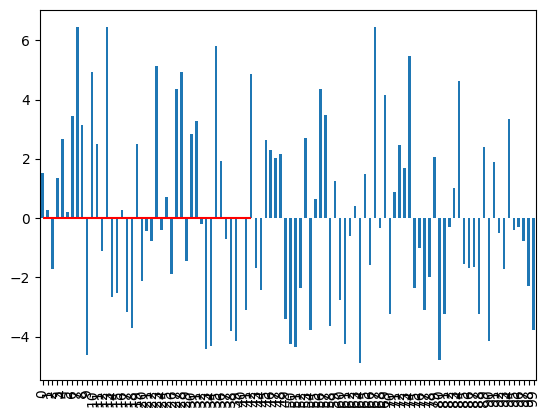

In [76]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

## 오차항의 등분산성

In [77]:
# 오차항의 등분산성 (Homoscedasticity)
# 등분산성(homoscedasticity)는 회귀 분석에서 중요한 가정 중 하나로, 오차 항의 분산이 일정하게 유지되는 것을 의미합니다. 즉, 독립 변수의 값이 변하더라도 오차 항의 분산이 일정해야 합니다. 이 가정이 충족되지 않으면, **이분산성(heteroscedasticity)**이 발생하게 됩니다.

# 등분산성 (Homoscedasticity):
# 오차 항의 분산이 독립 변수의 값과 무관하게 일정합니다.
# 이상적인 회귀 모델에서는 오차가 무작위로 분포하며 일정한 분산을 가집니다.


In [78]:
# 등분산성 검정 방법
# 잔차 플롯 (Residual Plot)

# 잔차 플롯은 예측값과 잔차 간의 관계를 시각화하여 등분산성을 확인하는 데 사용됩니다.
# 잔차 플롯에서 오차 항이 무작위로 분포하고 일정한 폭을 가지면 등분산성을 만족한다고 볼 수 있습니다.
# 만약 잔차가 부채꼴 모양이나 원뿔 모양으로 나타난다면, 이분산성을 의심할 수 있습니다.

# Breusch-Pagan 검정
# 잔차의 제곱을 독립 변수에 회귀 분석하여 이분산성을 검정하는 방법입니다.
# 귀무가설: 등분산성이 있다. p >0.05
# 대립가설: 이분산성이 있다.

#White Test를 통한 이분산 검정

In [79]:
import seaborn as sns


### 잔차 플롯 (Residual Plot)

In [80]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

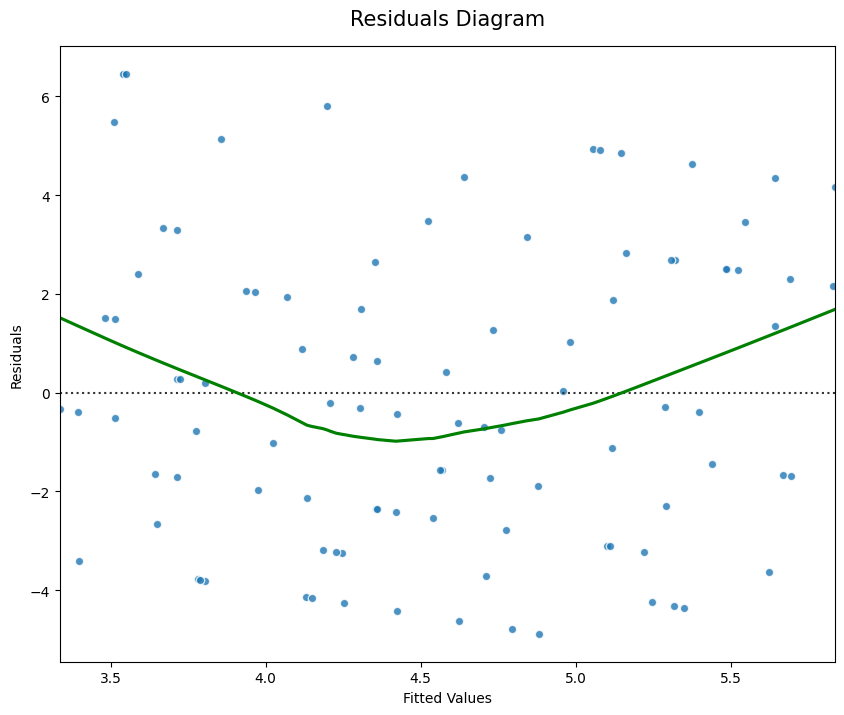

In [81]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target",
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

### Breusch-Pagan 검정

In [82]:
# Breusch-Pagan 검정을 통해 회귀 분석에서 오차 항의 등분산성 가정이 충족되는지 검정합니다. 
# statsmodels 라이브러리의 het_breuschpagan 함수를 사용하며, 검정 결과를 출력합니다.

In [83]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  2.298
p-value :  0.317
f-value :  1.141
f p-value :  0.324


In [84]:
# p-value:
# p-value < 0.05: 귀무가설(등분산성 있음)을 기각, 이분산성이 있다고 판단
# p-value ≥ 0.05: 귀무가설 채택, 등분산성이 있다고 판단

In [85]:
# 결론
# p-value가 0.05보다 작으면 이분산성이 존재한다고 판단할 수 있습니다.
# 이분산성이 있는 경우, 회귀 모델의 결과 해석이 왜곡될 수 있으므로 로그 변환이나 가중회귀 분석 등의 방법을 고려해야 합니다.

### White Test를 통한 이분산 검정

In [86]:
# White Test는 회귀 분석에서 오차 항의 이분산성(heteroscedasticity)을 검정하기 위해 사용되는 방법입니다. 
# 이 검정은 Breusch-Pagan 검정보다 더 일반적인 형태로, 독립 변수의 비선형 함수까지 고려합니다. 
# 따라서 이분산성이 비선형적인 경우에도 검출할 수 있습니다.

In [87]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 3.685668483507154, 'Test Statistic p-value': 0.5954981441967797, 'F-Statistic': 0.7194211536220783, 'F-Test p-value': 0.6104471318978897}


In [88]:
# Test Statistic p-value: 0.5955

# p-value > 0.05이므로, 귀무가설(H0)을 기각할 수 없습니다.
# 이는 **오차 항이 등분산성을 가진다 (Homoscedasticity)**는 귀무가설을 기각할 충분한 증거가 없음을 의미합니다.
# 따라서, 이분산성(Heteroscedasticity)이 없고, 등분산성을 만족한다고 판단할 수 있습니다.
# F-Test p-value: 0.6104

# F-Test p-value도 0.05보다 크기 때문에, 이 결과 역시 귀무가설을 기각하지 못합니다.
# F-검정 결과 역시 등분산성을 만족한다고 판단할 수 있습니다.